In [ ]:
%pip install pandas numpy matplotlib seaborn collections

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [3]:
%pip install networkx

  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 10.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
%pip install plotly 

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.6 MB 11.9 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.6 MB 11.8 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 11.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [2]:
plt.style.use('ggplot')
sns.set_theme()

In [3]:
df = pd.read_csv("Redes Complejas_Tarea_Trabajo calificado_M4(in).csv")

In [4]:
G = nx.from_pandas_edgelist(df, source='Origen', target='Destino', edge_attr='Peso')

In [5]:
centralidad_grado = nx.degree_centrality(G)
centralidad_intermediacion = nx.betweenness_centrality(G, weight='Peso')
centralidad_cercania = nx.closeness_centrality(G)
centralidad_vectorpropio = nx.eigenvector_centrality(G, max_iter=500)

In [6]:
metricas_df = pd.DataFrame({
    'Nodo': list(G.nodes()),
    'Grado': pd.Series(centralidad_grado),
    'Intermediación': pd.Series(centralidad_intermediacion),
    'Cercanía': pd.Series(centralidad_cercania),
    'Vector Propio': pd.Series(centralidad_vectorpropio)
}).sort_values('Grado', ascending=False)

In [7]:
metricas_df.to_excel("metricas_centralidad.xlsx", index=False)

In [8]:
componentes = list(nx.connected_components(G))
print(f"🔗 Número de componentes conexas: {len(componentes)}")

🔗 Número de componentes conexas: 1


In [9]:
cuellos_df = metricas_df.sort_values('Intermediación', ascending=False).head(5)
print("\n🔧 Nodos con mayor intermediación (cuellos de botella):")
print(cuellos_df[['Nodo', 'Intermediación']])


🔧 Nodos con mayor intermediación (cuellos de botella):
            Nodo  Intermediación
Nodo_9    Nodo_9        0.175595
Nodo_32  Nodo_32        0.164116
Nodo_16  Nodo_16        0.159864
Nodo_12  Nodo_12        0.153061
Nodo_10  Nodo_10        0.149660


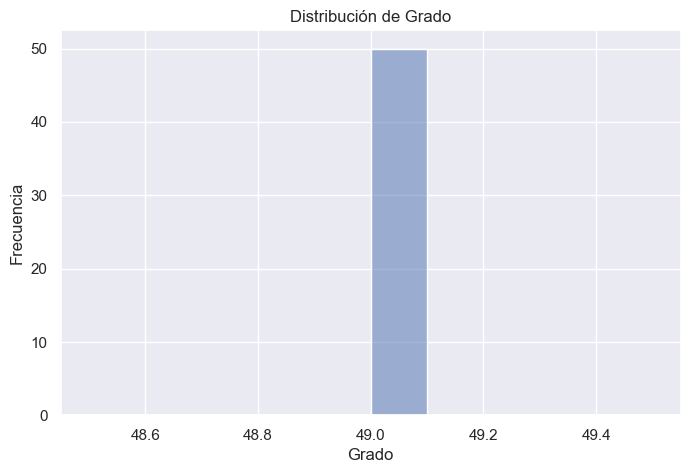

In [10]:
grados = [d for n, d in G.degree()]
plt.figure(figsize=(8, 5))
sns.histplot(grados, bins=10, kde=True)
plt.title("Distribución de Grado")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")
plt.savefig("distribucion_grado.png")
plt.show()

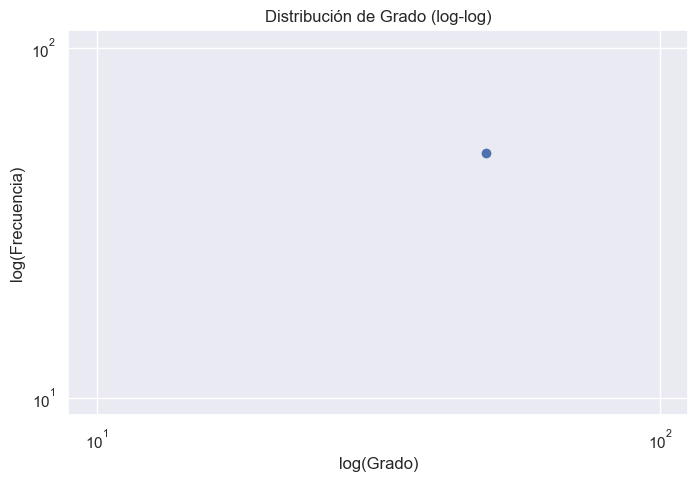

In [11]:
grado_freq = Counter(grados)
x, y = zip(*grado_freq.items())
x = np.array(x)
y = np.array(y)
plt.figure(figsize=(8, 5))
plt.loglog(x, y, 'bo')
plt.title("Distribución de Grado (log-log)")
plt.xlabel("log(Grado)")
plt.ylabel("log(Frecuencia)")
plt.grid(True)
plt.savefig("ley_potencia_loglog.png")
plt.show()


In [12]:
clustering_promedio = nx.average_clustering(G)
longitud_promedio = nx.average_shortest_path_length(G)

print(f"\n Coeficiente promedio de clustering: {clustering_promedio:.4f}")
print(f" Longitud promedio del camino: {longitud_promedio:.4f}")


 Coeficiente promedio de clustering: 1.0000
 Longitud promedio del camino: 1.0000


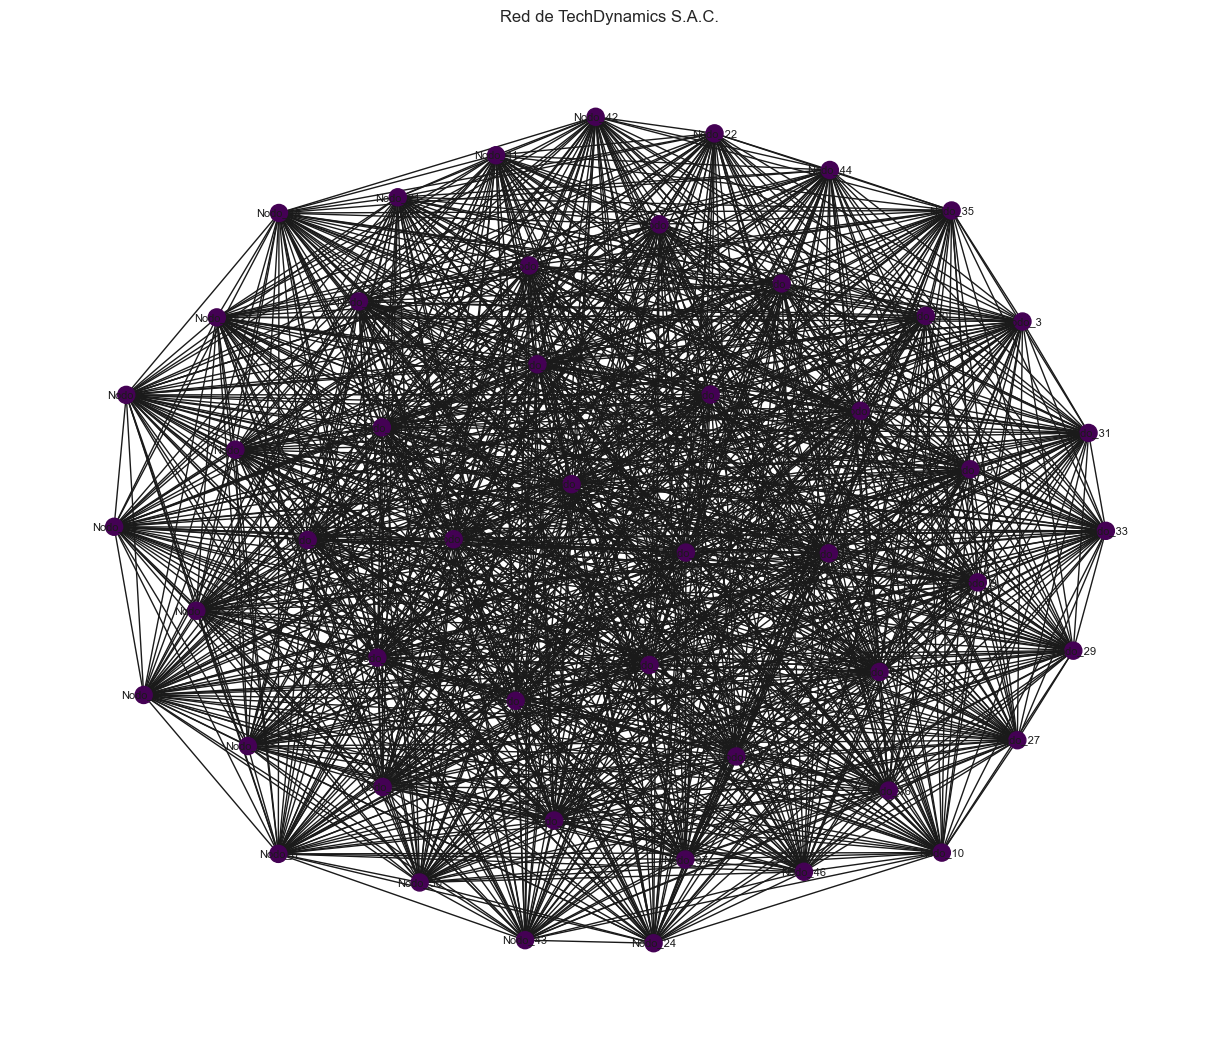

In [13]:
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nodos = list(G.nodes())
colores = [centralidad_grado[n] for n in nodos]
nx.draw(G, pos, node_color=colores, node_size=150, cmap=plt.cm.viridis, with_labels=True, font_size=8)
plt.title("Red de TechDynamics S.A.C.")
plt.savefig("grafo_coloreado_grado.png")
plt.show()

In [14]:
densidad = nx.density(G)
print(f"\n Densidad de la red: {densidad:.4f}")


 Densidad de la red: 1.0000


In [22]:
import plotly.graph_objects as go

# Create edges
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Create nodes
node_x = []
node_y = []
node_text = []
node_color_values = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(f'Node: {node}<br>Degree: {centralidad_grado[node]:.4f}<br>Betweenness: {centralidad_intermediacion[node]:.4f}<br>Closeness: {centralidad_cercania[node]:.4f}<br>Eigenvector: {centralidad_vectorpropio[node]:.4f}')
    node_color_values.append(centralidad_grado[node]) # Using degree centrality for color

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node_text,
    marker=dict(
        color='rgb(144, 238, 144)',  # ✅ Verde claro fijo
        size=12,
        line_width=1,
        line=dict(color='black', width=0.5)  # Contorno para visibilidad
    )
)


In [24]:
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title=dict(
            text='Red Interactiva de TechDynamics S.A.C.',
            font=dict(size=16)
        ),
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        annotations=[dict(
            text="Interactive graph using Plotly",
            showarrow=False,
            xref="paper", yref="paper",
            x=0.005, y=-0.002
        )],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
)

fig.show()